In [1]:
!pwd
import sys
sys.executable

/c/Users/shingo/jupyter_notebook/tf_2_work/statsmodels_work


'C:\\Users\\shingo\\Anaconda3\\envs\\tfgpu20\\python.exe'

# 【統計モデリング】scikit-learnが一般化線形モデル（GLM）をサポートしたので使ってみた
- https://cpp-learning.com/scikit-learn-glm/

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
print(sklearn.__version__)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import TweedieRegressor

0.23.0


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

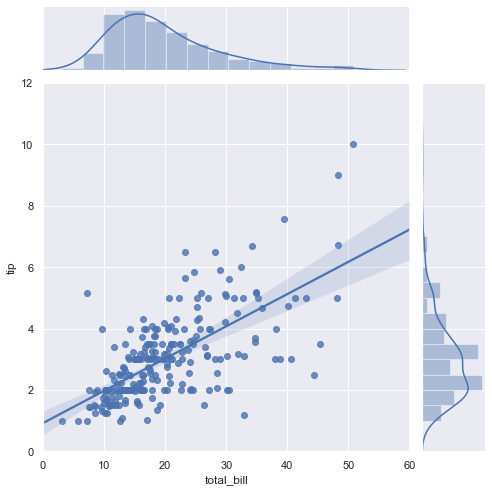

In [3]:
# チップのデータセット
df = sns.load_dataset("tips")

display(df.head(3))
df.info()
display(df.isnull().any())

# 会計総額とチップのデータを可視化
sns.set(style="darkgrid")
sns.jointplot(x="total_bill", y="tip", data=df,
              kind='reg',
              xlim=(0, 60), ylim=(0, 12),
              color="b",
              height=7)

In [4]:
# dfからnumpy.ndarrayに変換
y = df['tip'].values          # 目的変数：y = [y0, y1, y2, ... yi]
X = df['total_bill'].values   # 説明変数：x = [x0, x1, x2, ... xi]

# [x0, x1, x2,..] から [[x0], [x1], [x2]] に変換
#X = X.reshape(len(X),1)
X = X[:, None]
print(X.shape)

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

(244, 1)


## ポアソン回帰: 確率分布：ポアソン分布、リンク関数：対数リンク関数

score: 1.643367687287345e-05


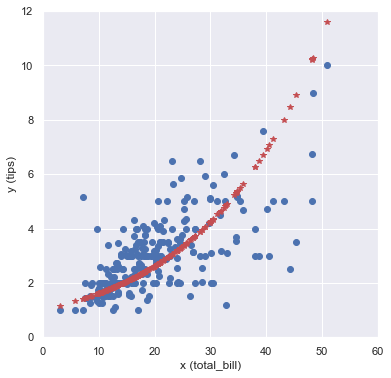

In [12]:
# glm = PoissonRegressor()  # デフォルト
glm = PoissonRegressor(
                        alpha=0,  # ペナルティ項
                        fit_intercept=False,  # 切片
                        max_iter=300,  # ソルバーの試行回数
                      )
glm.fit(X_train, y_train)
print("score:", glm.score(X_test, y_test))

y_hat = glm.predict(X)
# print(y_hat)

# 可視化
fig = plt.figure(figsize=(6.0, 6.0))
plt.plot(X, y, "o")
plt.plot(X, y_hat, "*", color="r")
plt.xlabel('x (total_bill)'), plt.ylabel('y (tips)')
plt.xlim(0, 60), plt.ylim(0, 12)
plt.show()

## TweedieRegressorを使えば、もっと柔軟な統計モデリングができます
- 確率分布やリンク関数を任意に変更できます
- PoissonRegressor を使ったときと同じ結果

score: 1.643367687287345e-05


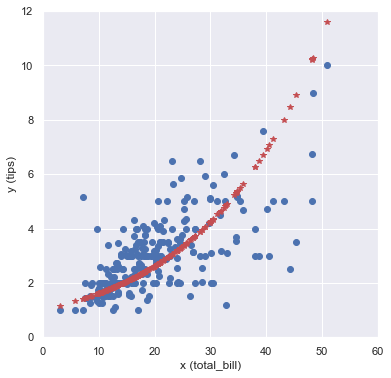

In [11]:
# ポアソン回帰: 確率分布：ポアソン分布、リンク関数：対数リンク関数
reg = TweedieRegressor(
                        alpha=0,  # ペナルティ項
                        power=1,  # Poisson distribution
                        link='log',  # link function
                        fit_intercept=False,  # 切片
                        max_iter=300,  # ソルバーの試行回数
                      )

reg.fit(X_train, y_train)
print("score:", reg.score(X_test, y_test))

y_hat = reg.predict(X)
# print(y_hat)

# 可視化
fig = plt.figure(figsize=(6.0, 6.0))
plt.plot(X, y, "o")
plt.plot(X, y_hat, "*", color="r")
plt.xlabel('x (total_bill)'), plt.ylabel('y (tips)')
plt.xlim(0, 60), plt.ylim(0, 12)
plt.show()

## 線形回帰モデル
- 確率分布：正規分布、リンク関数：恒等リンク関数にすれば、線形回帰モデル

score: 0.10645740263928205


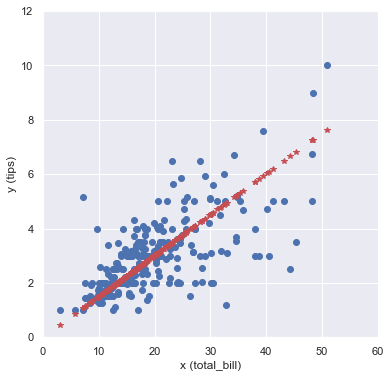

In [10]:
reg = TweedieRegressor(
                        alpha=0,  # ペナルティ項
                        power=0,  # Normal distribution
                        link='identity',  # link function
                        fit_intercept=False,  # 切片
                        max_iter=300,  # ソルバーの試行回数
                      )

reg.fit(X_train, y_train)
print("score:", reg.score(X_test, y_test))

y_hat = reg.predict(X)
# print(y_hat)

# 可視化
fig = plt.figure(figsize=(6.0, 6.0))
plt.plot(X, y, "o")
plt.plot(X, y_hat, "*", color="r")
plt.xlabel('x (total_bill)'), plt.ylabel('y (tips)')
plt.xlim(0, 60), plt.ylim(0, 12)
plt.show()